In [90]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

In [91]:
#opening our data file.

with open("data.txt","r") as file:
    data = file.read()

In [92]:
tweets = data.split(',')

In [93]:
#preparing list for doc2vec
updated = []
for tweet in tweets:
    updated.append(tweet.strip("'[ ]'"))

In [94]:
#preparing word list for model.

cleaned_data = []
for tweets in updated:
    helper = tweets.split(' ')
    cleaned_data.append(helper)

In [95]:
#for doc2vec it is important to create tagged documents
from gensim.models import doc2vec

def tagged_document(documents_list):

    helper = []
    for i,document in enumerate(documents_list):
        helper.append(doc2vec.TaggedDocument(document, [i]))
    return helper

train_data = tagged_document(cleaned_data)

In [96]:
#initializing the doc2vec model

#min_count -> ignores words below this

model = doc2vec.Doc2Vec(vector_size=100,min_count=2,epochs=40)

#building the vocabulary
model.build_vocab(train_data)

In [97]:
#train the do2vec model
#total_examples = total documents

model.train(train_data, total_examples=model.corpus_count, epochs = model.epochs)

In [98]:
#getting the vectors for our document
model.infer_vector(cleaned_data[0])

array([ 0.24568723, -1.2349601 , -1.8193328 , -1.285137  , -2.2291927 ,
       -1.5115426 , -0.03938142,  2.282128  , -3.72364   , -1.581346  ,
        0.34505343, -1.8306859 ,  0.29053348, -0.12873636, -1.9236138 ,
       -2.463188  ,  0.43578297, -0.394689  , -0.85277367, -1.5875292 ,
        0.8561822 ,  0.00454585, -0.5946985 ,  2.1619055 ,  2.334487  ,
       -0.9317844 , -0.54586613, -0.00910752,  0.38888425,  0.512048  ,
       -0.54642683,  1.6793768 , -2.5275924 ,  0.5448669 , -1.8352413 ,
        1.2444627 ,  0.2747754 , -3.7194648 , -0.45562765,  0.05510097,
        0.9053493 , -2.7563968 , -1.1314063 , -1.1258366 , -0.03441843,
        1.3393023 ,  1.6039553 ,  2.9438224 ,  0.40167055, -0.06385476,
        0.2718262 , -0.5375563 , -2.695804  ,  0.34028992,  3.8389676 ,
       -0.48868763,  1.0951984 ,  0.09688149, -1.4744512 , -0.28722516,
       -0.84183437,  3.2164295 , -1.9294558 , -1.2481285 , -0.45228073,
        3.1705582 ,  1.3881408 ,  2.0421968 , -1.6928097 ,  0.77

In [99]:
vec_data = []
for index in range(len(cleaned_data)):
    temp_vec = model.infer_vector(cleaned_data[index])
    vec_data.append(temp_vec)

In [100]:
#creating a dataframe with it vec_data has all our documents vectors

df = pd.DataFrame(data=vec_data, columns=[i for i in range(100)])

In [101]:
pca = PCA(n_components=100)

In [102]:
pca.fit_transform(df)
pca.components_

array([[-0.09392648, -0.02016571,  0.07812822, ...,  0.06634083,
         0.08140925, -0.02751109],
       [-0.00166992, -0.07149627, -0.09611949, ..., -0.02149172,
         0.07852659, -0.0304914 ],
       [ 0.04344996, -0.1499885 ,  0.07614483, ...,  0.15544394,
         0.04126011,  0.15925387],
       ...,
       [ 0.07250985,  0.0323955 , -0.08120348, ..., -0.0543154 ,
        -0.03912208, -0.0962753 ],
       [-0.06793014, -0.13008133, -0.10298348, ..., -0.01058003,
        -0.1189688 ,  0.00224026],
       [-0.1898949 , -0.02761841, -0.13764262, ..., -0.0915098 ,
         0.14627421,  0.04205601]], dtype=float32)

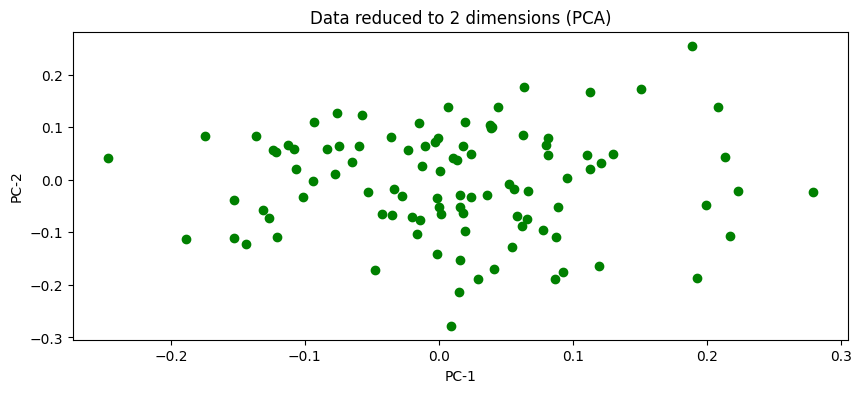

In [103]:
x1 = pca.components_[0]
x2 = pca.components_[1]

plt.figure(figsize=(10,4))
plt.plot(x1,x2,"go")
plt.xlabel("PC-1")
plt.ylabel("PC-2")
plt.title("Data reduced to 2 dimensions (PCA)")
plt.show()

In [104]:
#with kernel PCA

kpca = KernelPCA(n_components=100,kernel='poly',degree=3)

In [105]:
kpca.fit_transform(df)

array([[-0.45483494,  0.28222704, -0.10082349, ...,  0.5157737 ,
         0.2934948 ,  0.45126298],
       [-0.09346842, -0.35491627, -0.36803976, ...,  0.21185796,
        -0.13375317,  0.21129896],
       [-0.36809903,  0.06340616, -0.10140338, ...,  0.11614129,
        -0.0366699 , -0.08363011],
       ...,
       [-0.43931004,  0.20611201,  0.6906932 , ...,  0.0360832 ,
         0.42879274, -0.3527076 ],
       [-0.03796024, -0.16339399, -0.06422801, ..., -0.02132981,
         0.04991471,  0.29262018],
       [-0.11442954,  0.23032036,  0.64966524, ..., -1.0718085 ,
        -0.34404522, -0.945331  ]], dtype=float32)

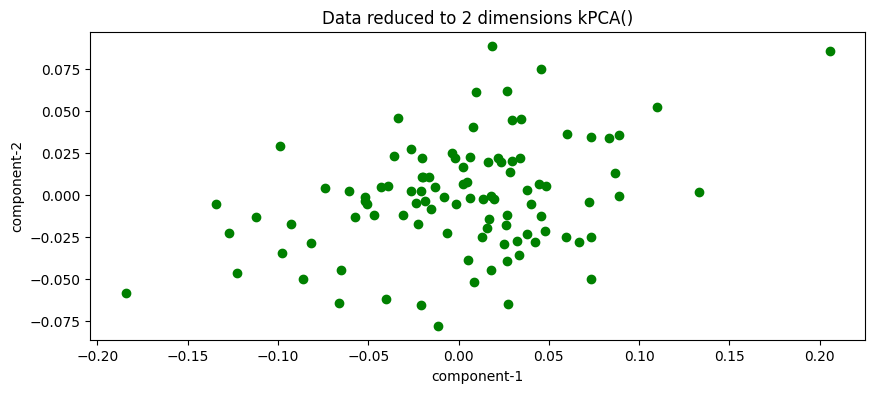

In [106]:
x1 = kpca.eigenvectors_[0]
x2 = kpca.eigenvectors_[1]

plt.figure(figsize=(10,4))
plt.plot(x1,x2,"go")
plt.xlabel("component-1")
plt.ylabel("component-2")
plt.title("Data reduced to 2 dimensions kPCA()")
plt.show()

In [107]:
#labelling the data

import pandas as pd

data = pd.read_csv('./data/vector_data_tesla.csv')
data.drop(columns='Unnamed: 0',inplace=True)

In [108]:
from sklearn.cluster import KMeans

X = data.drop(columns='date')

In [110]:
kmeans = KMeans(n_clusters=2, init='k-means++')

In [118]:
import warnings
warnings.filterwarnings(action='ignore')
kmeans.fit(X)

KMeans(n_clusters=2)

In [122]:
predicted = []

for i in range(len(X)):
    predicted.append(kmeans.predict([X.loc[i]]))

In [123]:
target = []
for value in predicted:
    if value == 1:
        target.append("positive")
    else:
        target.append("negative")

In [124]:
#exporting the df for model

from data_preparation import data_reading
tweets_data = pd.read_csv('./data/stock_tweets.csv')
tesla = data_reading(tweets_data,'Tesla, Inc.')

In [125]:
dates = tesla.date.unique()
df['date'] = dates
df['target'] = target

In [126]:
df.to_csv("vector_data_tesla.csv")